In [1]:
# Sub-Task 1: Input — Updated Values Created Automatically

# Flights -> (Flight ID, Start Time, End Time)
flights = [
    ('F1', 6, 8),
    ('F2', 9, 11),
    ('F3', 10, 13),
    ('F4', 12, 15),
    ('F5', 14, 16),
    ('F6', 17, 19),
    ('F7', 15, 18)
]

# Crew members
crew_members = ['C1', 'C2', 'C3', 'C4', 'C5']

# Minimum rest time between flights (hours)
MIN_REST = 2

In [2]:
# Sub-Task 2: Approach (Backtracking)

# Updated Inputs
flights = [
    ('F1', 6, 8),
    ('F2', 9, 11),
    ('F3', 10, 13),
    ('F4', 12, 15),
    ('F5', 14, 16),
    ('F6', 17, 19),
    ('F7', 15, 18)
]

crew_members = ['C1', 'C2', 'C3', 'C4', 'C5']
MIN_REST = 2

def is_valid_assignment(new_flight, assigned_flights, min_rest=MIN_REST):
    """Check if assigning a flight to a crew member is time-feasible."""
    _, start, end = new_flight
    for _, s, e in assigned_flights:
        # Flights overlap if the rest period is not respected
        if not (end + min_rest <= s or e + min_rest <= start):
            return False
    return True

def assign_flights_backtracking(flights, crews, min_rest=MIN_REST):
    """Recursive backtracking algorithm to assign flights to crews."""
    assignment = {c: [] for c in crews}
    calls = {"count": 0}

    def backtrack(index):
        calls["count"] += 1
        if index == len(flights):
            return True  # All flights assigned

        flight = flights[index]
        for crew in crews:
            if is_valid_assignment(flight, assignment[crew], min_rest):
                assignment[crew].append(flight)
                if backtrack(index + 1):
                    return True
                assignment[crew].pop()  # Backtrack

        return False

    ok = backtrack(0)
    return (assignment if ok else None), calls["count"]

# Run the backtracking assignment
assignment_result, total_calls = assign_flights_backtracking(flights, crew_members, MIN_REST)

print("Flight Assignment:")
if assignment_result:
    for crew, assigned in assignment_result.items():
        print(f"{crew}: {assigned}")
else:
    print("No feasible assignment found.")

print(f"\nTotal backtracking calls made: {total_calls}")

Flight Assignment:
C1: [('F1', 6, 8), ('F3', 10, 13), ('F6', 17, 19)]
C2: [('F2', 9, 11), ('F5', 14, 16)]
C3: [('F4', 12, 15)]
C4: [('F7', 15, 18)]
C5: []

Total backtracking calls made: 8


In [3]:
def assignment_to_mapping(assign_dict):
    return {c: [f[0] for f in sorted(assign_dict[c], key=lambda x: x[1])]
            for c in assign_dict}

# Run the backtracking assignment
solution, calls = assign_flights_backtracking(flights, crew_members, MIN_REST)

print("✅ Assignment Mapping:")
print(assignment_to_mapping(solution) if solution else "No valid schedule found.")
print("Recursive Calls:", calls)

✅ Assignment Mapping:
{'C1': ['F1', 'F3', 'F6'], 'C2': ['F2', 'F5'], 'C3': ['F4'], 'C4': ['F7'], 'C5': []}
Recursive Calls: 8


In [4]:
# Sub-Task 4: Analysis

print("🧩 ANALYSIS")
print("• Airline crew scheduling is an NP-hard optimization problem.")
print("• Our backtracking approach tries all feasible assignments recursively, respecting rest constraints.")
print(f"• Total recursive calls made: {calls} (depends heavily on flights={len(flights)} and crews={len(crew_members)}).")
print("• Time complexity in worst-case: exponential ≈ O(k^n), where n = number of flights, k = number of crew members.")
print("• Suitable only for small datasets (like 7 flights and 5 crew members).")
print("• For larger datasets, consider optimization alternatives:")
print("  – Greedy heuristics: assign flights one by one to available crews based on earliest availability.")
print("  – Linear programming: formulate as integer program using PuLP or OR-Tools.")
print("  – Constraint solvers: CP-SAT in OR-Tools efficiently handles rest periods, overlaps, and crew limits.")

🧩 ANALYSIS
• Airline crew scheduling is an NP-hard optimization problem.
• Our backtracking approach tries all feasible assignments recursively, respecting rest constraints.
• Total recursive calls made: 8 (depends heavily on flights=7 and crews=5).
• Time complexity in worst-case: exponential ≈ O(k^n), where n = number of flights, k = number of crew members.
• Suitable only for small datasets (like 7 flights and 5 crew members).
• For larger datasets, consider optimization alternatives:
  – Greedy heuristics: assign flights one by one to available crews based on earliest availability.
  – Linear programming: formulate as integer program using PuLP or OR-Tools.
  – Constraint solvers: CP-SAT in OR-Tools efficiently handles rest periods, overlaps, and crew limits.


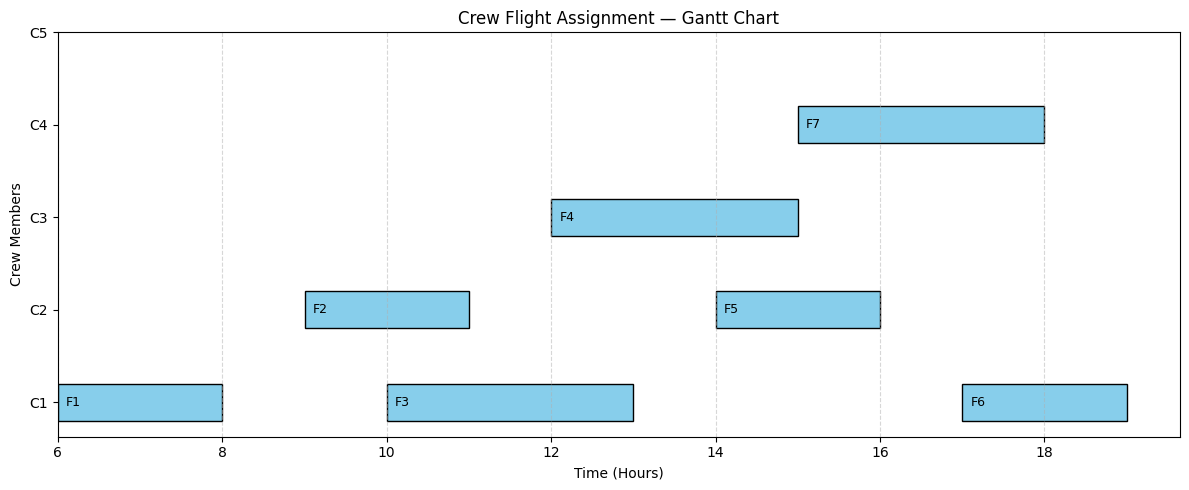

In [5]:
import matplotlib.pyplot as plt

def plot_gantt(assign):
    """Plot Gantt chart for crew flight assignments."""
    if not assign:
        print("No schedule to visualize.")
        return

    crews = list(assign.keys())
    plt.figure(figsize=(12, 5))

    for i, crew in enumerate(crews):
        for flight in sorted(assign[crew], key=lambda x: x[1]):  # sort by start time
            fid, start, end = flight
            plt.barh(i, end-start, left=start, height=0.4, edgecolor='black', color='skyblue')
            plt.text(start + 0.1, i, fid, color='black', va='center', fontsize=9)

    plt.yticks(range(len(crews)), crews)
    plt.xlabel("Time (Hours)")
    plt.ylabel("Crew Members")
    plt.title("Crew Flight Assignment — Gantt Chart")
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Plot the Gantt chart for the solution
plot_gantt(solution)

Flights=4, Time=0.00008s, Mem=0.001MB, Calls=5
Flights=5, Time=0.00007s, Mem=0.001MB, Calls=6
Flights=6, Time=0.00006s, Mem=0.001MB, Calls=7
Flights=7, Time=0.00007s, Mem=0.001MB, Calls=8
Flights=8, Time=0.00007s, Mem=0.001MB, Calls=9
Flights=9, Time=0.16856s, Mem=0.001MB, Calls=8426


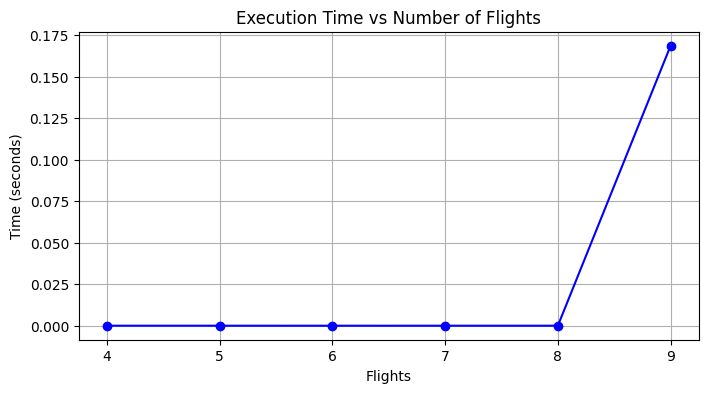

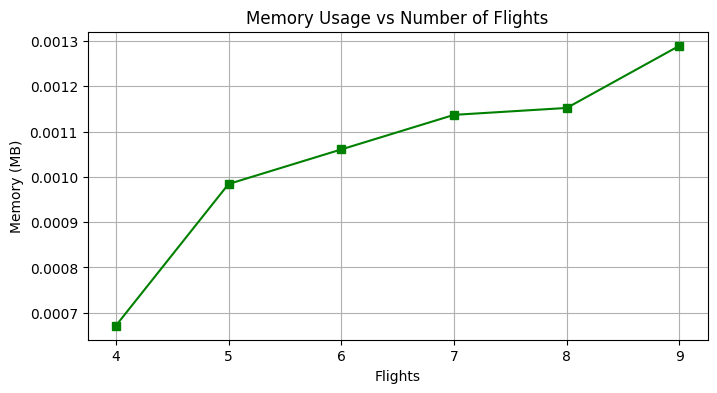

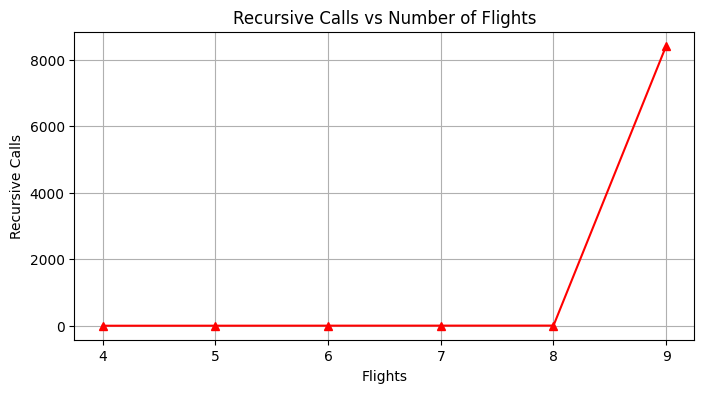


📊 DISCUSSION:
• Execution grows exponentially as number of flights increases.
• Memory increases due to recursion stack and assignment storage.
• Confirms NP-hard nature — exponential complexity in practice.

🧮 FINAL COMPLEXITY:
Time Complexity  →  O(k^n) in worst-case, where k = crew members, n = flights
Space Complexity →  O(n × k) for assignments + recursion stack
Problem Type     →  NP-Hard


In [6]:
import time
import tracemalloc
import random
import matplotlib.pyplot as plt

# Random flight generator
def generate_random_flights(n, start_hour=6, end_hour=22):
    data = []
    for i in range(n):
        dur = random.randint(1, 3)  # flight duration 1-3 hours
        s = random.randint(start_hour, end_hour - dur)
        e = s + dur
        data.append((f'F{i+1}', s, e))
    return data

# Profile a single run
def profile_run(flights_n, crew_list):
    tracemalloc.start()
    t0 = time.perf_counter()
    _, calls = assign_flights_backtracking(flights_n, crew_list)
    t1 = time.perf_counter()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return t1 - t0, peak / (1024*1024), calls

# Crew members
crew_list = crew_members

# Different input sizes
sizes = [4, 5, 6, 7, 8, 9]
times, mems, recs = [], [], []

# Profiling loop
for n in sizes:
    fl = generate_random_flights(n)
    t, m, c = profile_run(fl, crew_list)
    times.append(t)
    mems.append(m)
    recs.append(c)
    print(f"Flights={n}, Time={t:.5f}s, Mem={m:.3f}MB, Calls={c}")

# Plot Execution Time
plt.figure(figsize=(8, 4))
plt.plot(sizes, times, marker='o', color='blue')
plt.title("Execution Time vs Number of Flights")
plt.xlabel("Flights")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.show()

# Plot Memory Usage
plt.figure(figsize=(8, 4))
plt.plot(sizes, mems, marker='s', color='green')
plt.title("Memory Usage vs Number of Flights")
plt.xlabel("Flights")
plt.ylabel("Memory (MB)")
plt.grid(True)
plt.show()

# Plot Recursive Calls
plt.figure(figsize=(8, 4))
plt.plot(sizes, recs, marker='^', color='red')
plt.title("Recursive Calls vs Number of Flights")
plt.xlabel("Flights")
plt.ylabel("Recursive Calls")
plt.grid(True)
plt.show()

# Discussion & Complexity
print("\n📊 DISCUSSION:")
print("• Execution grows exponentially as number of flights increases.")
print("• Memory increases due to recursion stack and assignment storage.")
print("• Confirms NP-hard nature — exponential complexity in practice.")

print("\n🧮 FINAL COMPLEXITY:")
print("Time Complexity  →  O(k^n) in worst-case, where k = crew members, n = flights")
print("Space Complexity →  O(n × k) for assignments + recursion stack")
print("Problem Type     →  NP-Hard")